In [2]:
from Ker_exp_data import *

getting joystick and nominal directions for 10 consecutive direction switches with the same coherence level

In [70]:
n = 125
test = Load_exp_data()
D_n = test.get_nominal_dir()
js = test.get_coh_block_js()
b = 0
js_clean, D_n_clean = test.clean_nan(js[b],D_n[b])
coh = test.get_coh_val(b*10)

data loaded


In [71]:
tf = np.asarray(test.get_timeframe(0))
dt = np.mean(tf[1:]-tf[:-1])*1000

In [80]:
dn_angle = np.unwrap(np.angle(D_n_clean))
js_angle = np.unwrap(np.angle(js_clean))+2*np.pi # I still have problems with the whrap up issues

Calculating the kernel with real joystic data

In [81]:
d_n_mat = D_n_matrix(dn_angle,n)
ker = Ker_mat(d_n_mat,js_angle)

Plotting the kernel

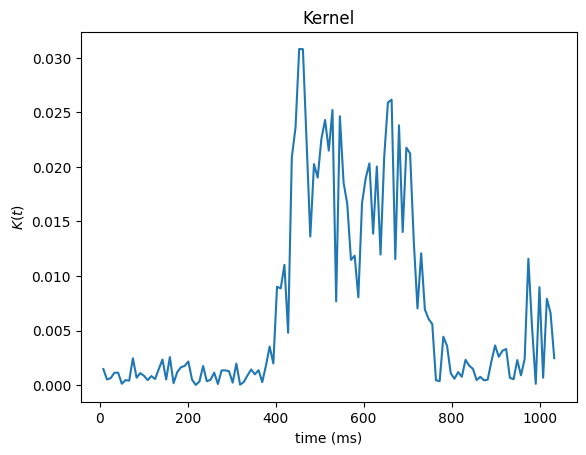

In [82]:
fig, ax = plt.subplots()
ax.plot(np.linspace(dt,(n-1)*dt,n-2),np.abs(ker[1:-1]))
ax.set_title('Kernel')
ax.set_ylabel(r'$K(t)$')
ax.set_xlabel('time (ms)')
plt.show()

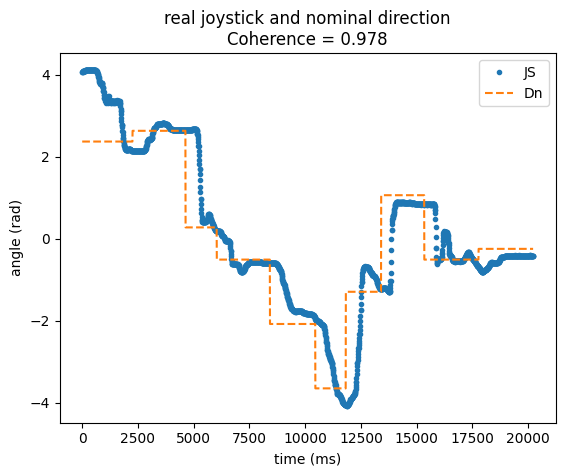

In [83]:

fig,ax = plt.subplots()
ax.plot(np.linspace(0,len(js_angle)*dt,len(js_angle)),js_angle,'.',label='JS')
ax.plot(np.linspace(0,len(js_angle)*dt,len(js_angle)),dn_angle,'--',label='Dn')
ax.set_title('real joystick and nominal direction\nCoherence = '+str(np.round(coh,3)))
ax.set_ylabel('angle (rad)')
ax.set_xlabel('time (ms)')
ax.legend()

Computing the predicted joystick direction with the previously calculated kernel and the nominal direction 

In [84]:
js_p = np.convolve(ker,dn_angle,mode='same')

Comparing the predicted joystick direction with the simulated one

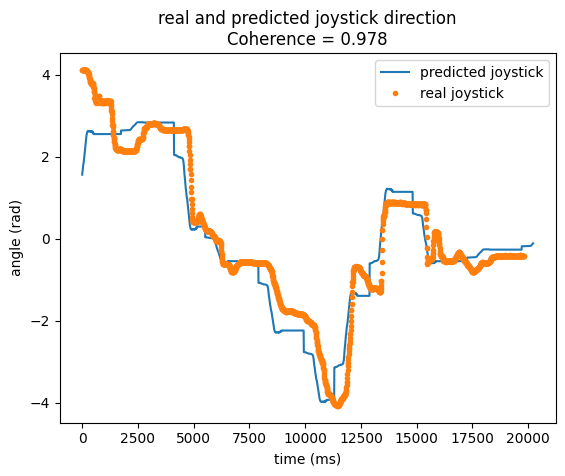

In [85]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,len(js_p)*dt,len(js_p)),np.real(js_p),label='predicted joystick')
ax.plot(np.linspace(0,len(js_angle[50:])*dt,len(js_angle[50:])),js_angle[50:],'.',label='real joystick')
ax.set_title('real and predicted joystick direction\nCoherence = '+str(np.round(coh,3)))
ax.set_ylabel('angle (rad)')
ax.set_xlabel('time (ms)')
ax.legend()
plt.show()

In [86]:
Cor = np.correlate(np.real(js_p),js_angle,mode='full')[len(js_p)-1:]
aut = np.correlate(js_angle,js_angle,mode='full')[len(js_p)-1:]

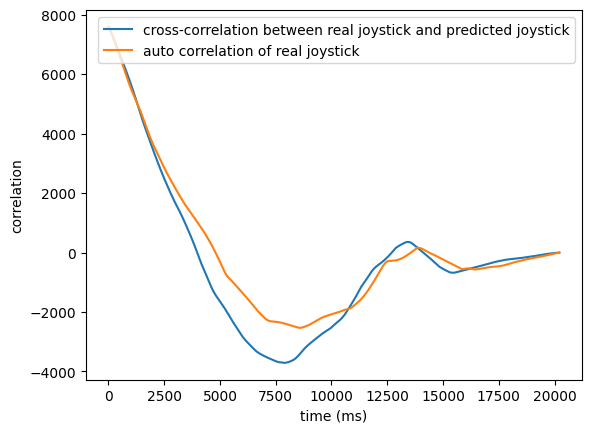

In [87]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0,len(Cor)*dt,len(Cor)),Cor,label='cross-correlation between real joystick and predicted joystick directions')
ax.plot(np.linspace(0,len(Cor)*dt,len(Cor)),aut*Cor[0]/aut[0],label='auto correlation of real joystick direction')
ax.set_ylabel('correlation')
ax.set_xlabel('time (ms)')
ax.legend()